In [20]:
# import necessary libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler



In [51]:
# load dataset directly from the UCI Machine Learning Repository 
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"


columns = ["mpg", "cylinders", "displacement", "horsepower",
           "weight", "acceleration", "model_year", "origin", "car_name"]

df = pd.read_csv(url, names=columns, sep='\s+', na_values="?")

print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   
3  16.0          8         304.0       150.0  3433.0          12.0   
4  17.0          8         302.0       140.0  3449.0          10.5   

   model_year  origin                   car_name  
0          70       1  chevrolet chevelle malibu  
1          70       1          buick skylark 320  
2          70       1         plymouth satellite  
3          70       1              amc rebel sst  
4          70       1                ford torino  


In [22]:
# checking for missing values
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

In [23]:
# basic statistics
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [24]:
# checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [25]:
# handling missing values
# replacing missing horsepower values with the column mean

mean_hp = df['horsepower'].mean()
df['horsepower'] = df['horsepower'].fillna(mean_hp)

# checking again to confirm all missing values handled
df.isnull().sum()


mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

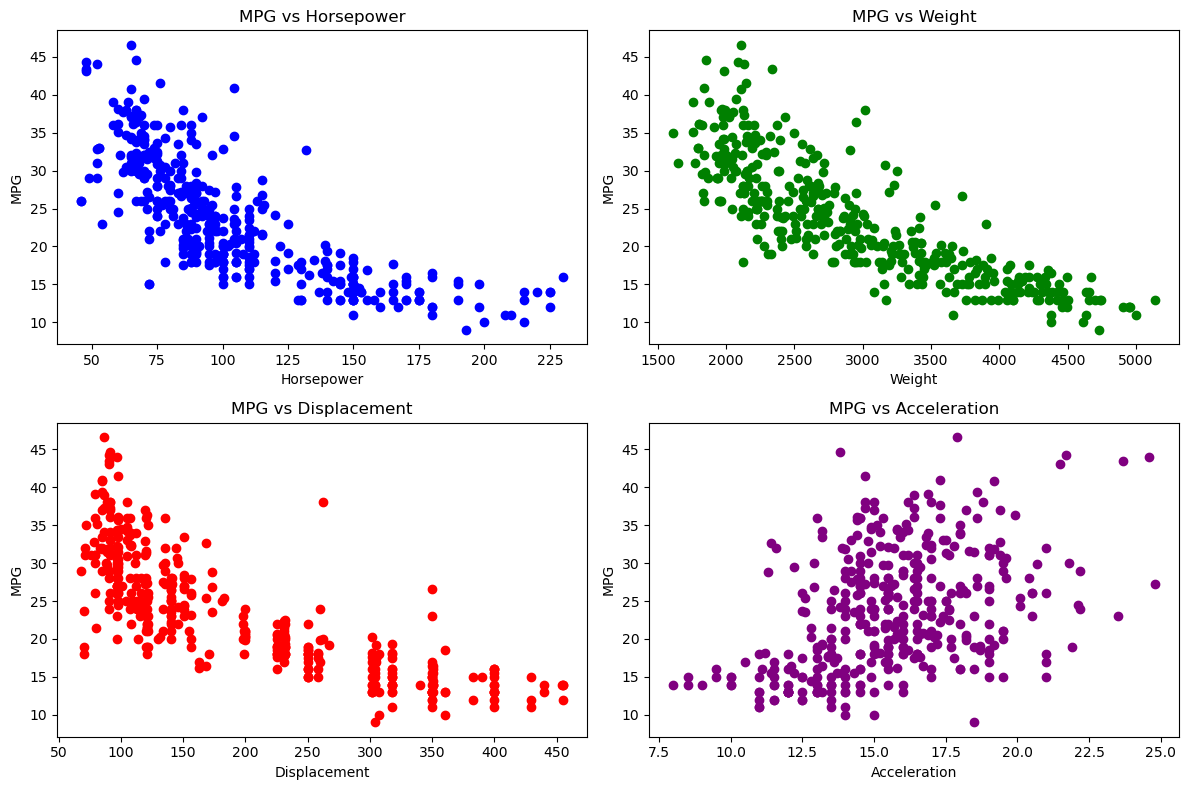

In [26]:
# scatter plots for MPG vs other key features

plt.figure(figsize=(12, 8))

# 2x2 grid of subplots
plt.subplot(2, 2, 1)
plt.scatter(df['horsepower'], df['mpg'], color='blue')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('MPG vs Horsepower')

plt.subplot(2, 2, 2)
plt.scatter(df['weight'], df['mpg'], color='green')
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.title('MPG vs Weight')

plt.subplot(2, 2, 3)
plt.scatter(df['displacement'], df['mpg'], color='red')
plt.xlabel('Displacement')
plt.ylabel('MPG')
plt.title('MPG vs Displacement')

plt.subplot(2, 2, 4)
plt.scatter(df['acceleration'], df['mpg'], color='purple')
plt.xlabel('Acceleration')
plt.ylabel('MPG')
plt.title('MPG vs Acceleration')

plt.tight_layout()
plt.show()


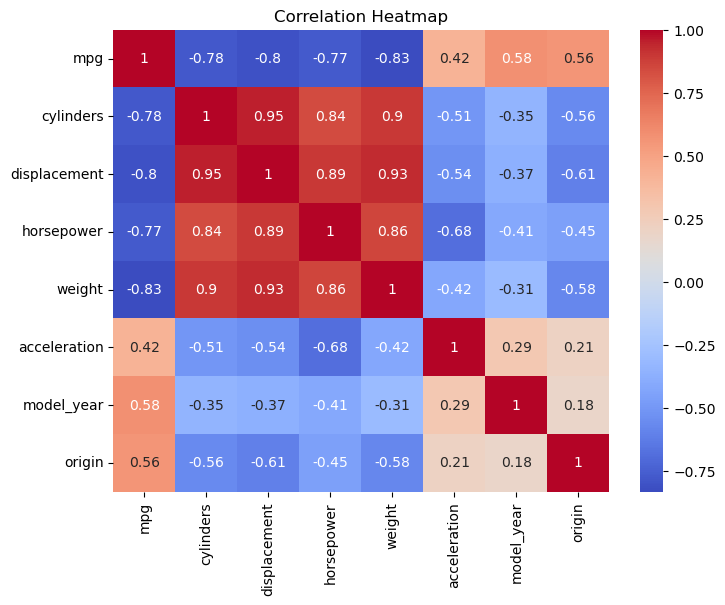

In [27]:
# correlation heatmap

corr = df.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [37]:
# selecting the input features X and target output y
X = df[["cylinders", "displacement", "horsepower",
        "weight", "acceleration", "model_year", "origin"]]
y = df["mpg"]

# quick check
X.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,8,307.0,130.0,3504.0,12.0,70,1
1,8,350.0,165.0,3693.0,11.5,70,1
2,8,318.0,150.0,3436.0,11.0,70,1
3,8,304.0,150.0,3433.0,12.0,70,1
4,8,302.0,140.0,3449.0,10.5,70,1


In [52]:
# split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# confirm the shapes
print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)

Training set: (318, 7)
Testing set: (80, 7)


In [64]:
# creating and training the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict MPG for the test data
y_pred = model.predict(X_test_scaled)



In [63]:
# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)
print()

# Display coefficients
print("Coefficients of the model:")
coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})
print(coeff_df.to_string(index=False))


Mean Squared Error (MSE): 8.19545210407378
R² Score: 0.8475731044779435

Coefficients of the model:
     Feature  Coefficient
   cylinders    -0.259376
displacement     1.439240
  horsepower    -0.436628
      weight    -5.686413
acceleration     0.206612
  model_year     2.865341
      origin     1.064333


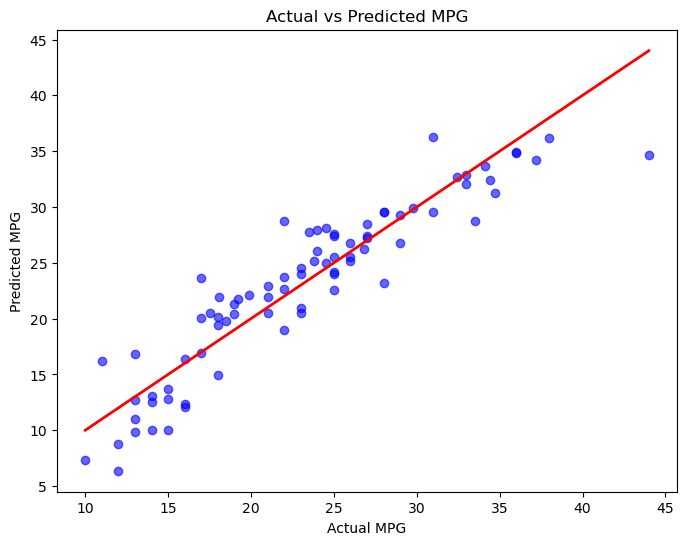

In [46]:
# Plot Actual vs Predicted MPG
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='red', linewidth=2)
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.title("Actual vs Predicted MPG")
plt.show()